Business Understanding

Syriatel Mobile Telecom trading as Syriatel, is the largest and oldest mobile carrier operating in the Syrian Arab Republic. Syriatel is a publicly traded telecommunications company founded in 2000 and headquartered in Damascus.

The company operates a standard 2G GSM service over 900 MHz along with 1800 MHz in dense urban areas, and 3G UMTS HSPA+ over B1 (2100 MHz), covering 99% of Syria's population. 4G LTE was launched under the banner "Super Surf", which provides peak data rates up to 150 Mbps, reportedly over B3 (1800 MHz) in August 2017 following licensing approval by the Ministry of Communications and Technology. The service was announced at the 59th Damascus International Fair.
Source:https://halberdbastion.com/intelligence/mobile-networks/syriatel

There is a rise in competition in the telecommunication industry hence a need to come up with predictable patterns for customer churn.
Through analysis of various data points and utilizing predictive analytics,the company will be able to identify patterns and behaviours that will help with recomendations on measures to take in order to retain and onboard more customers.



1.Data Understanding

In [1]:
#Importing relevant libraries 
import pandas as pd 
import numpy as np 

In [2]:
#Fetching the data for further analysis.
syriatel_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
syriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# checking for data shape 
syriatel_df.shape

(3333, 21)

In [4]:
# checking for data information 
syriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking for missing values and duplicates
syriatel_df.isna().sum

<bound method DataFrame.sum of       state  account length  area code  phone number  international plan  \
0     False           False      False         False               False   
1     False           False      False         False               False   
2     False           False      False         False               False   
3     False           False      False         False               False   
4     False           False      False         False               False   
...     ...             ...        ...           ...                 ...   
3328  False           False      False         False               False   
3329  False           False      False         False               False   
3330  False           False      False         False               False   
3331  False           False      False         False               False   
3332  False           False      False         False               False   

      voice mail plan  number vmail messages  total day 

In [6]:
syriatel_df.duplicated().value_counts()

False    3333
dtype: int64

-We do not have any missing values and duplicates hence clean data to proceed with analysis

-Since Syriatel, is the largest and oldest mobile carrier operating in the Syrian Arab Republic we will drop the that columns of area code, phone number and account length as they have no effect on customer churn,


In [7]:
#dropping columns not required 
syriatel_df= syriatel_df.drop(columns= ['phone number', 'account length', 'area code'], axis=1)
syriatel_df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Exploratory Data Analysis

In [8]:
syriatel_df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Visualization

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

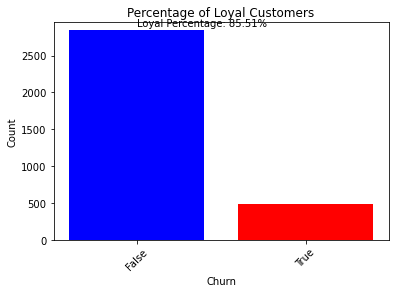

In [10]:
#checking for customer loyalty percentage using visualization
churn_count = syriatel_df['churn'].replace({0: 'False', 1: 'True'}).value_counts()
#calculating the percentage of loyal customers 
loyal_cust_pecentage = churn_count.get('False', 0) / sum(churn_count) * 100
# Plot the bar chart
plt.bar(['False', 'True'], churn_count.values, color=['blue', 'red'], tick_label=['False', 'True'])
plt.title('Percentage of Loyal Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(churn_count) + 100)
# Display loyal percentage only if 'False' exists in churn_counts
if 'False' in churn_count:
    plt.text(0, max(churn_count) + 50, f'Loyal Percentage: {loyal_cust_pecentage:.2f}%')
plt.show()


The above graph indicates that most of the customers are loyal to the Syrialtel company based on the false counts  and the churn rate count 

In [11]:
# determining the total calls made by state
syriatel_df['total_calls'] = syriatel_df['total day calls'] + syriatel_df['total eve calls'] + syriatel_df['total night calls'] + syriatel_df['total intl calls']
syriatel_df.groupby('state')['total_calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total_calls, dtype: int64

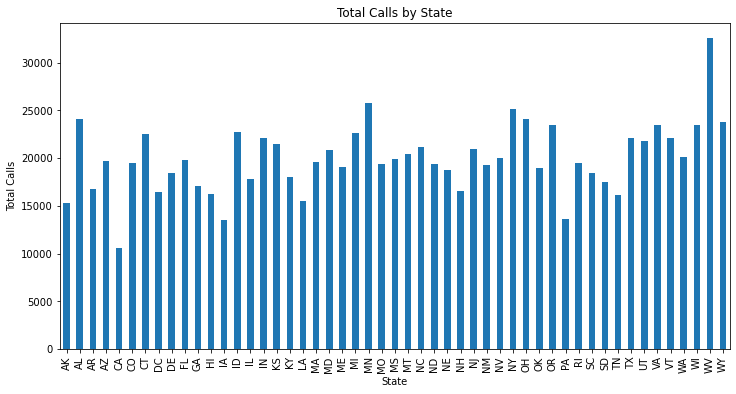

In [12]:
#visualizing the total calls per state 
syriatel_df.groupby('state')['total_calls'].sum().plot(kind='bar', figsize=(12, 6), rot=90)

# Add labels and title to the plot
plt.title('Total Calls by State')
plt.xlabel('State')
plt.ylabel('Total Calls')
plt.show()

West Virginia has the highest number of call with California having the least.

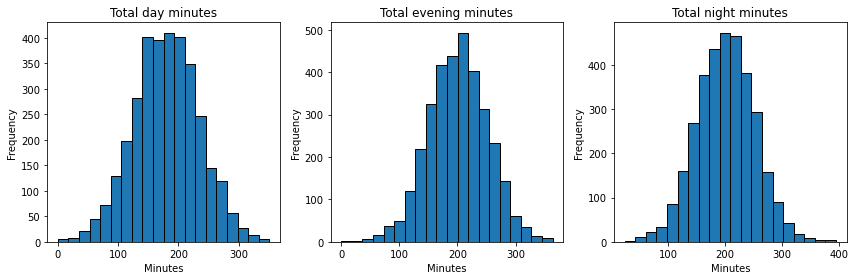

In [13]:
#Displaying the total charge of calls per area code
import matplotlib.pyplot as plt

# Create subplots for each variable
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms for each variable
axs[0].hist(syriatel_df['total day minutes'], bins=20, edgecolor='k')
axs[0].set_title('Total day minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Frequency')

axs[1].hist(syriatel_df['total eve minutes'], bins=20, edgecolor='k')
axs[1].set_title('Total evening minutes')
axs[1].set_xlabel('Minutes')
axs[1].set_ylabel('Frequency')

axs[2].hist(syriatel_df['total night minutes'], bins=20, edgecolor='k')
axs[2].set_title('Total night minutes')
axs[2].set_xlabel('Minutes')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The total minutes a day, in the evening and at night are normally distributed.

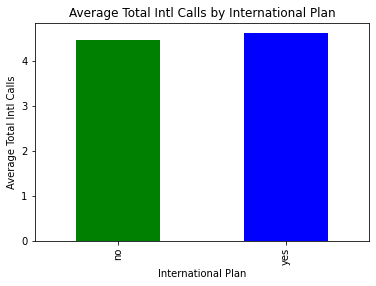

In [14]:
#Comparison of the international calls made.
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = syriatel_df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['green', 'blue'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()



The above graph indicates that theres no much difference for those making international calls without an international call plan and those with  an international call plan.

<AxesSubplot:xlabel='count', ylabel='customer service calls'>

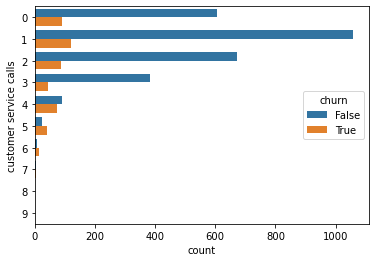

In [15]:
#Coparing the relationship between the number of calls to the call center and loyalty

sns.countplot(y='customer service calls', hue='churn', data=syriatel_df)

The above chart shows that customers making calls through customer service are more loyal.

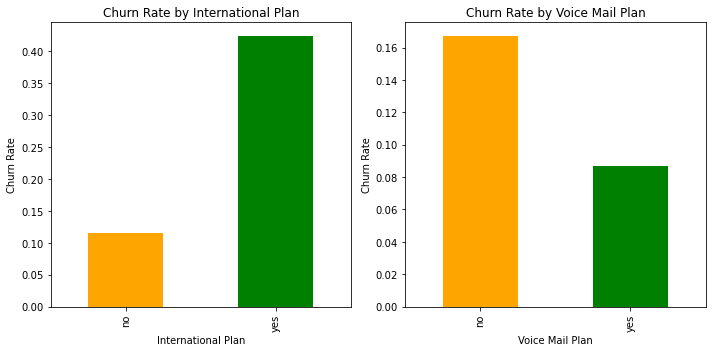

In [16]:
# Map the values in 'voice mail plan' column to labels

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for International Plan
syriatel_df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['orange', 'green'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot for Voice Mail Plan
syriatel_df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['orange', 'green'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

plt.tight_layout()
plt.show()

The above comparisons indicate that customers with voice mail plan are more loyal than those with international plan

Checking for outliers

In [17]:
#separating categorical and numerical columns
numerical_df = syriatel_df[['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = syriatel_df[['state', 'churn', 'international plan', 'voice mail plan']]

In [18]:
#function to check for outliers 
def show_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
#lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
show_outliers(numerical_df).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [19]:
def drop_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data
filtered_data = drop_outliers(numerical_df)

Data Preparation
Choosing important features for our modelling and checking the correlation existing between variables using heatmap.

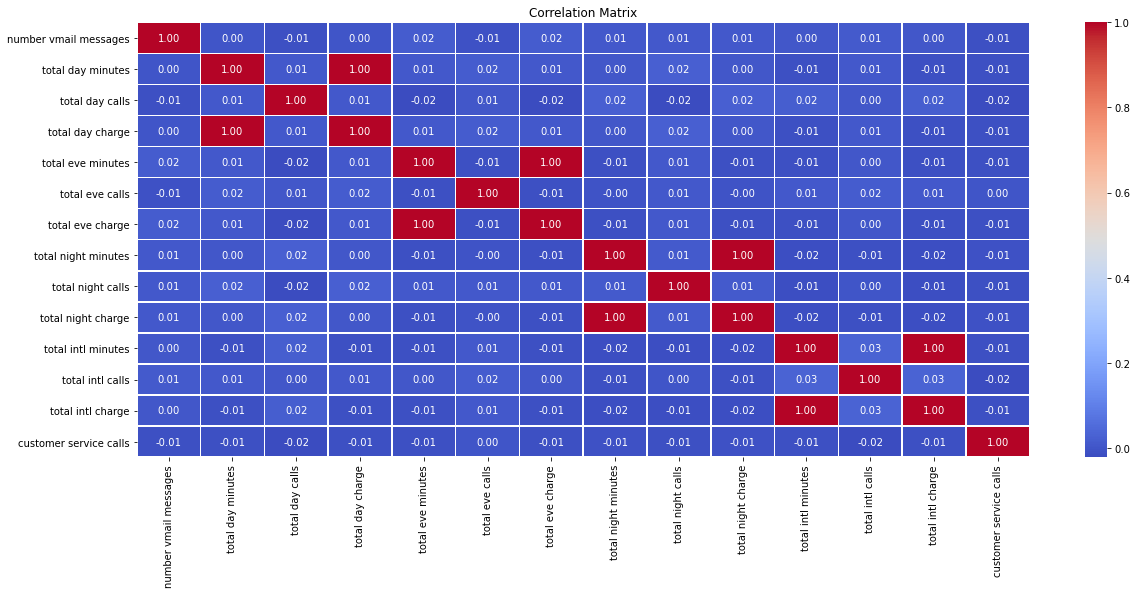

In [20]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap shows variables with perfect correlation with other variables at 1.

We therefore will remove one of the correlacetd factors which are total day minutes, total eve minutes, /total night minutes and total international minutes to avoid multicollinearity occuring  if this predictor variables are highly correlated.

In addition we will drop the area code since its not useful for modelling and drop state which is categorical variable.


In [21]:
#droping features with perfect correlation.
final_syriatel_df = syriatel_df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'state'], axis=1)
final_syriatel_df.shape

(3333, 14)

Transforming categorical variables using OHE

In [23]:
#importing relevant libraries 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

In [ ]:

# Select the categorical columns to be encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(final_syriatel_df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([final_syriatel_df.drop(categorical_columns, axis=1), encoded_df], axis=1)
final_df

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total_calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,303,1.0,0.0,0.0,1.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,332,1.0,0.0,0.0,1.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,333,1.0,0.0,1.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,255,0.0,1.0,1.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,359,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False,292,1.0,0.0,0.0,1.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False,239,1.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False,264,1.0,0.0,1.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False,336,0.0,1.0,1.0,0.0


In [ ]:
#create a function to convert churn using label ecoder
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column 
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Train test split

In [ ]:
#using the standard scaler to standardize the data 
# Split the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Using SMOTE to remove class imbalance

In [ ]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Building a baseline logistic regression model

In [ ]:
# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred_1 = logreg.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [ ]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

In [ ]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report
logreg_report = generate_classification_report(y_test, y_test_pred_1)
logreg_report

,precision,recall,f1-score,support
0,0.880837,0.966431,0.921651,566.00000
1,0.586957,0.267327,0.367347,101.00000
accuracy,0.860570,0.860570,0.860570,0.86057
macro avg,0.733897,0.616879,0.644499,667.00000
weighted avg,0.836337,0.860570,0.837716,667.00000


Precision: The precision values for class 0 and class 1 are 0.88 and 0.587, respectively. A higher precision indicates that the model has a low rate of false positives for that class. Class 0 has a higher precision than class 1, therefore the model is better at predicting class 0 than class 1.

Recall: The recall values for class 0 and class 1 are 0.966 and 0.267, respectively,showing the model's ability to correctly identify positive instances. Similarly, precision class 0 has a higher recall than class 1.

F1-Score: The F1-scores for class 0 and class 1 are 0.92 and 0.367, respectively. The F1-score is the harmonic mean of precision and recall,this gives a balance between the two metrics with, class 0 having a higher F1-score than class 1.

Accuracy: The accuracy of the model is 0.861, which indicates the proportion of correctly predicted instances out of the total number of instances.

We therefoer conclude thatlogistic regression has 86.1% prediction accuracy of test data.

In addition,based on these metrics, the model performs relatively better for class 0 compared to class 1

{'roc_auc_train': 0.8938266199649737,
 'roc_auc_test': 0.6168789140398139,
 'accuracy_train': 0.8938266199649737,
 'accuracy_test': 0.8605697151424287,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22b92358fa0>}

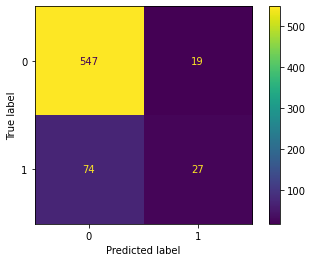

In [ ]:
#checking the metric of baseline model and draw confusion matrix 
evaluate_model_metrics(logreg, X_train_resampled,y_train_resampled, X_test, y_test)

The above indicates that  that logistsic regression that roc_auc value on train data is 0.8938266199649737 and train data is 0.6168789140398139 this therefore means that the model has relatively high level of discrimination between classes on the training data than testing data

Confusion matrix is used to display the predicted and true labels of logistic regression model where the True positives 27, False negative 74, True Negative 547 and False positive 10.

The model achieves a training accuracy of about 89.4% and a testing accuracy of about 86.0%, therefore, the model performs relatively well in predicting the class labels for both the training and testing datasets.
It can be seen that the model is not much accurate in making prediction because of overfitting

Cross validation score to improve model performance and reduce overfitting

In [ ]:
# Create an instance of Logistic Regression with cross-validation
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


{'roc_auc_train': 0.8922942206654991,
 'roc_auc_test': 0.6177623062659623,
 'accuracy_train': 0.8922942206654991,
 'accuracy_test': 0.8620689655172413,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22b91e39c10>}

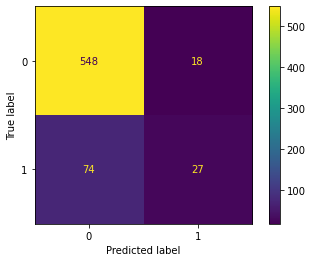

In [ ]:
evaluate_model_metrics(logreg_final,X_train_resampled,y_train_resampled,X_test,y_test)

After using cross validation and picking 5 folds we get an improved model with accuracy mean of 0.8620689655172413 which represents 86.2% accuracy level in prediction customer churn in test data. in training data it dropped to 0.8620689655172413

This adjusted model demonstrates significant change in level of performance, correctly predicting the class labels for the majority of instances in both the training and testing datasets.
The testing accuracy is slightly lower than the training accuracy, which is expected although not with a significant difference.

We can proceed the second model to check its perfomance in predicting customer churn and whether its a better perfomer than logistic regresion

Building Decison Trees classifier model

In [ ]:
# Create an instance of DecisionTreeClassifier with regularization parameters
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fit the model on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_resampled)
y_test_pred_2 = dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)

{'roc_auc_train': 0.8857267950963224,
 'roc_auc_test': 0.8704212294020922,
 'accuracy_train': 0.8857267950963222,
 'accuracy_test': 0.9250374812593704,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22b921f5fd0>}

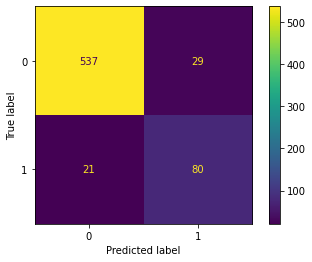

In [ ]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

roc_auc_train: It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of 0.886 indicates that the model performs well in classifying the training instances.

roc_auc_test:It measures the model's ability to generalize its predictions to unseen data. A value of 0.870 suggests that the model maintains a good level of performance on the testing data, indicating that it is not overfitting.

accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.886indicates that the model achieves a high level of accuracy on the training data.

accuracy_test: A value of 0.925 suggests that the model performs very well on the testing data, indicating that it generalizes well and is not overfitting.

The confusion matrix shows that TP 80, TN 537, FP 29 and FN 21, hence an improvement in prediction.

We then check the classification report of all the metrics related to Decison Tree classifier

In [ ]:
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.962366,0.948763,0.955516,566.000000
1,0.733945,0.792079,0.761905,101.000000
accuracy,0.925037,0.925037,0.925037,0.925037
macro avg,0.848155,0.870421,0.858710,667.000000
weighted avg,0.927777,0.925037,0.926199,667.000000


Precision: In class 0, the precision is 0.962, indicating that 96.2% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.733, meaning that 73.3% of the instances predicted as class 1 are true positives.

Recall: In class 0, the recall is 0.949, indicating that 94.9% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.79, meaning that 79% of the actual class 1 instances are correctly identified as true positives.

F1-score: In class 0, the F1-score is 0.956, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.762, suggesting a slightly lower balance between precision and recall for class 1.

Accuracy: Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.975, meaning that the model correctly predicts the class labels for 92.5% of the instances.

Macro avg: Macro average calculates the average metrics (precision, recall, F1-score) for both classes, giving equal weight to each class which are 0.848155, 0.870421 and 0.858710 while Weighted avg calculates the average metrics, taking into account the support (number of instances) for each class. It provides a weighted average based on the number of instances in each class which are 0.927777, 0.925037 and 0.926199.

 Building a random forest model

In [ ]:
# Create a random forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_resampled)
y_test_pred_3 = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)


{'roc_auc_train': 0.8712784588441331,
 'roc_auc_test': 0.8191669873701151,
 'accuracy_train': 0.8712784588441331,
 'accuracy_test': 0.8725637181409296,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22b94274040>}

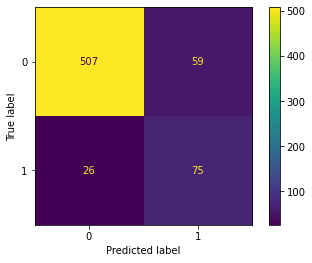

In [ ]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)

Random Forest classifier has achieved an accuracy of approximately 87.1% on the training data and 87.2% on the testing data. This is an indication of good performance in distinguishing between the positive and negative classes, with an area under the ROC curve (AUC) of 0.87 on the training data and 0.82 on the testing data. 

Overally, the model performs well indicating  a high level of accuracy in predicting the target variable.
The confusion matrix TP is 75, TN is 507, FP is 50 and FN is 26.

The accuracy is slightly lower than the one for Decison tree classifier

In [ ]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.951220,0.895760,0.922657,566.000000
1,0.559701,0.742574,0.638298,101.000000
accuracy,0.872564,0.872564,0.872564,0.872564
macro avg,0.755461,0.819167,0.780477,667.000000
weighted avg,0.891934,0.872564,0.879598,667.000000


For class 0 (negative class):

Precision: 95.1% is an indication that  a model prediction of the negative class is correct 95.1% of the time.
Recall: 89.6% means that the model correctly identifies 89.6% of the actual negative instances.
F1-score: 92.3% is a balanced measure of precision and recall, which is a combination of both metrics into a single value.
Support: 566 instances of the negative class are present in the dataset.

For class 1 (positive class):

Precision: 55.6% indicates that when the model predicts the positive class, it is correct 55.6% of the time.

Recall: 55.97% means that the model correctly identifies 55.97% of the actual positive instances.

F1-score: 74.3% is a balanced measure of precision and recall for the positive class.

Support: 101 instances of the positive class are present in the dataset.

The overall accuracy of the Random forest classifier is approximately 87.3%, indicating the percentage of correctly predicted instances overall.

Conclusions

Based on the three models it can be seen that logistic regression perfoms poorly in making predictions of customer churn.
Random forest clasifier and Decision trees performs well with 87.3% and 92.5% resectively.
Therefore it's important to improve the random forest clasifier and Decision trees due to their higher predictability using hyperparatemeters to achieve the best accuracy in order to increase the efficiency and perfomance of models.

Hyperparameter Tuning

Since our best model from the above 3 is Random forest clasifier we will use this Gridsearch to improve its perfomance

 Random Forest

In [ ]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier( random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)


{'roc_auc_train': 0.9358581436077057,
 'roc_auc_test': 0.8591033131581709,
 'accuracy_train': 0.9358581436077058,
 'accuracy_test': 0.9265367316341829,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x202b7f2d850>}

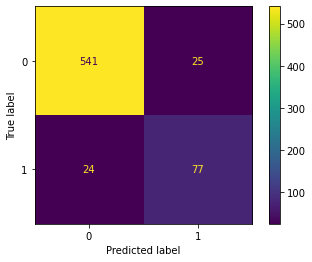

In [ ]:
#using the function above the draw confusion matrix 
evaluate_model_metrics(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

After tuning the parameters for the random forest classifier using grid search our model improved on its perfomance as explained below
The accuracy of the random forest model is now at 92.7%, which indicates that the model correctly predicted the class labels for the test data with an accuracy of approximately 93.6% and predicted train test with 94.4%. hence perfect for predicting customer churn.
The confusion matrix in tuned parameter represents TP as 77, TN as 541, FP as 25 and FN 24 which is best in making prediction

Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
dt_clf_final= DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf_final, param_grid=dt_param_grid, cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
best_model_2 = DecisionTreeClassifier(**best_params)

# Fit the best model to the resampled training data
best_model_2.fit(X_train_resampled, y_train_resampled)

# Predict on the training and test data
y_train_pred = best_model_2.predict(X_train_resampled)
y_test_pred = best_model_2.predict(X_test)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9043345008756568,
 'roc_auc_test': 0.8888062834552006,
 'accuracy_train': 0.9043345008756567,
 'accuracy_test': 0.9355322338830585,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22b9431ecd0>}

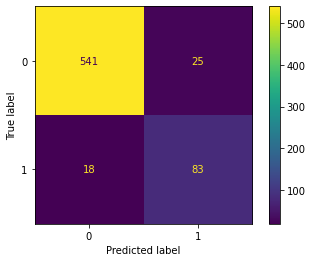

In [ ]:
evaluate_model_metrics(best_model_2, X_train_resampled, y_train_resampled, X_test, y_test)

The tuned decion tree model achieved accuracy dropped to 90.4% on the training data and increased to 93.6% on the test data. This indicates that the model is performing well and has learned patterns in the data that allow it to make accurate predictions. 
The logistic regression model achieved an AUC-ROC score of approximately 0.904 on the training data and 0.888 on the test data.

Evaluation
1.Based on accuracy level
We have so far build three machine learning models to help us in predicting customer churn in Syriatel company. From the model we have tested the accuracy of the three models and determined that logistic regression performs poorly having traning and testing rate of 89.6% to 86.0%.and prediction of training data dropped to 89.2% and the testing data slighly improved to 86.2% despite applying cross validation with 5 folds to reduce overfit.

We tried the other two model that is decision tree classifier and random forest which gave better accuracy. the decision tree training and testing accuracy is 88.6% and 92.5% while random forest training accuracy is 87.1% on training data and testing accuracy of 87.2%.

We can conclude that the decision tree had best prediction, followed by random forest. In order to improve our prediction accuracy we hypertytuned the models using gridsearch.

After the hyperparameter tuning decision tree model results improved to 90.4% acuracy on training data and 93.6% on testing data. Decision tree results improved to 93.6% on training data and 92.7 on testing data.

This is an indication of overfitting in random forest model making the decion trees a better option. 
Precision, recall and F1 score tuned decision tree performed better than random forest classifier.

Using ROC curve to check the best model

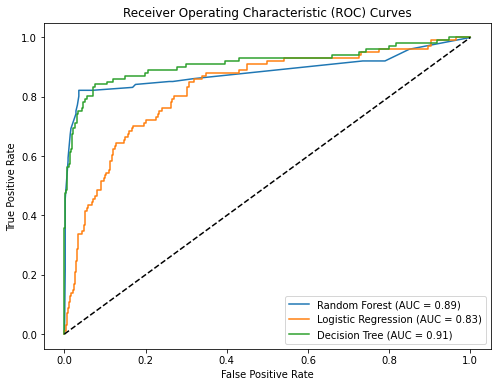

In [ ]:
#drawing ROC curve for the above three models 

# Compute ROC curves and AUC scores for each model
models = [best_model_2, logreg_final, best_model]
labels = ['Random Forest', 'Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


Based on AUC curve we make the following conclusions:

Decision Tree has an AUC of 0.91:This indicates that the Random Forest model has good discriminatory power and is able to distinguish between the positive and negative classes effectively. It achieves a high TPR while maintaining a low FPR, resulting in a larger area under the ROC curve.

Random Forest has an AUC of 0.88: The Random Forest model also performs well but slighly lower than decion tree classifier. It has a good ability to classify the two classes correctly, but it may have slightly higher false positive and false negative rates compared to decion tree.

Logistic Regression has an AUC of 0.83: The Logistic Regression model performs the lowest among the three models in terms of discrimination. It may have a relatively higher false positive and false negative rates compared to the other models, resulting in a smaller area under the ROC curve.

Decision Tree has the largest area under the ROC curve followed by random forest, indicating the former has the best overall discriminatory power and performs better in distinguishing between the positive and negative classes.
Decision Tree Classifier is best model for seriatel since it has largest area under the curve and also has highest accuracy in prediction of customer churn.

Conclusion and Recommendetion 
Decision tree classifier is the best model to be used by SyriaTel company

 Customer Churn Prediction: The high accuracy indicates that the model is effective in identifying customers who are likely to churn. This will help Syriatel proactively take measures to retain those customers and reduce customer churn rate.

Cost efficiency: By accurately predicting customer churn, Syriatel telecom company can direct its resources on targeted retention strategies, to try and entice customers who are likely to churn.
Some of recommended strategies are personalized offers, loyalty programs, and improved customer service.

Improved Customer Retention: With accurate prediction of customer churn the company can implement proactive measures to retain valuable customers through early intervention before churn, by addressing their concerns through customer feedback engagements,timely resolution of raised issues, and rewards through loyalty programmes.

Informed Business Strategy : Accurate churn prediction provides insights into customer behavior and patterns. This can help the company  understand the factors influencing to customer churn and make informed business decisions. 
It also enables the company come up with data-driven strategies, such as revamped products and service improvements, that can meet the needs of the customers,marketing campaigns, to improve on visibility and increase the market share.